# __Demo: Generating Fake Images with Generative Adversarial Networks (GANs)__

# __Steps to Perform__

Step 1: Import the Necessary Libraries

Step 2: Load and Preprocess the Data

Step 3: Build the Generator and Discriminator

Step 4: Compile the Models

Step 5: Train the Models

Step 6: Execute the Training

Step 7: Generate New Images and Evaluate the Model's Performance



# __Step 1: Import the Necessary Libraries__

In [1]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.datasets import mnist

In [2]:
print(f'Tensorflow Verion: {tf.__version__}')   # Should be 2.13.0
print(f'List of GPUs: {tf.config.list_physical_devices("GPU")}')
print(f'Keras Version: {keras.__version__}')

Tensorflow Verion: 2.13.0
List of GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Keras Version: 2.13.1


# __Step 2: Load and Preprocess the Data__

- Load the MNIST dataset and preprocess it.
- Preprocessing involves normalizing the data that can improve models' performance.

In [3]:
# Load MNIST data
(X_train, _), (_, _) = mnist.load_data()
# Normalize to between -1 and 1
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

## __Step 2 Code Breakdown__

The provided code snippet demonstrates how to load the MNIST dataset using TensorFlow and Keras. The MNIST dataset is a well-known dataset in the machine learning community, consisting of 70,000 grayscale images of handwritten digits (0-9), each of size 28x28 pixels. This dataset is commonly used for training and evaluating image classification models, as well as for generative tasks such as generating fake images with Generative Adversarial Networks (GANs).

1. **Loading the MNIST Dataset:**
   ```python
   (X_train, _), (_, _) = mnist.load_data()
   ```
   
   The `mnist.load_data()` function loads the MNIST dataset and returns two tuples: `(X_train, y_train)` and `(X_test, y_test)`. These tuples contain the training and testing data, respectively. The `X_train` and `X_test` variables contain the images, while the `y_train` and `y_test` variables contain the corresponding labels.

2. **Ignoring Unnecessary Data:**
   ```python
   (X_train, _), (_, _)
   ```

   In this snippet, the labels (`y_train` and `y_test`) are not needed, so they are ignored using the underscore `_`. This is a common practice in Python when you want to ignore certain values returned by a function. The focus here is on the training images (`X_train`), which will be used for further processing or training a model.

### __Example Context__

Let's consider an example where you are working on a project to generate fake images using Generative Adversarial Networks (GANs). In this context, you only need the training images from the MNIST dataset to train the GAN. The labels are not required because the GAN focuses on generating images rather than classifying them.

```python
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()

# Print the shape of the training data
print(f"Training data shape: {X_train.shape}")
```

### __Output__

The output of the above code will display the shape of the training data:

```
Training data shape: (60000, 28, 28)
```

This indicates that the `X_train` variable contains 60,000 training images, each of size 28x28 pixels.

# __Step 3: Build the Generator and Discriminator__

- Define the generator and discriminator models.
- Generator takes a random noise vector as input and outputs an image.
- Discriminator takes an image as input and outputs the probability of the image being real.

In [4]:
# Generator
def create_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Discriminator
def create_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

## __Step 3 Code Breakdown__

### __Generator Function Definition__

The provided code snippet defines a function `create_generator()` that constructs and returns a generator model for a Generative Adversarial Network (GAN) using the Keras Sequential API. In the context of GANs, the generator is responsible for creating fake images that resemble real images from the training dataset. Let's break down the code step by step to understand its components and functionality.

```python
def create_generator():
```

The `create_generator()` function is defined to create and return a generator model. This function encapsulates the architecture of the generator, making it easy to instantiate and use in the GAN training process.

#### __Model Initialization__

```python
model = Sequential()
```

The generator model is initialized as a Sequential model. The Sequential API in Keras allows you to build a neural network layer by layer in a straightforward manner.

#### __Adding Layers to the Generator__

1. **First Dense Layer:**
   ```python
   model.add(Dense(256, input_dim=100, activation='relu'))
   ```
   The first layer is a dense (fully connected) layer with 256 neurons. The `input_dim=100` parameter specifies that the input to this layer is a 100-dimensional vector, which is typically a random noise vector sampled from a standard normal distribution. The ReLU activation function is used to introduce non-linearity.

2. **Second Dense Layer:**
   ```python
   model.add(Dense(512, activation='relu'))
   ```
   The second layer is another dense layer with 512 neurons and ReLU activation. This layer further processes the output of the previous layer, allowing the model to learn more complex features.

3. **Third Dense Layer:**
   ```python
   model.add(Dense(1024, activation='relu'))
   ```
   The third layer is a dense layer with 1024 neurons and ReLU activation. This layer continues to increase the complexity and capacity of the model, enabling it to generate more detailed and realistic images.

4. **Output Dense Layer:**
   ```python
   model.add(Dense(784, activation='tanh'))
   ```
   The output layer is a dense layer with 784 neurons and a tanh activation function. The number of neurons (784) corresponds to the total number of pixels in a 28x28 image (28 * 28 = 784). The tanh activation function is used to scale the output values to the range [-1, 1], which is suitable for image data.

5. **Reshape Layer:**
   ```python
   model.add(Reshape((28, 28, 1)))
   ```
   The Reshape layer reshapes the 1D output vector (784) into a 2D image of shape (28, 28, 1). The last dimension (1) indicates that the image is grayscale. This reshaping is necessary to convert the output of the dense layers into the format of an image.

#### __Returning the Model__

```python
return model
```

The `create_generator()` function returns the constructed generator model. This model can then be used in the GAN training process to generate fake images.

#### __Summary__

The `create_generator()` function constructs and returns a generator model for a Generative Adversarial Network (GAN) using the Keras Sequential API. The generator model consists of several dense layers with ReLU activation, followed by an output dense layer with tanh activation and a Reshape layer. The input to the generator is a 100-dimensional random noise vector, and the output is a 28x28 grayscale image. This architecture allows the generator to learn to produce realistic images that resemble the real images from the training dataset. The generator model is a crucial component of the GAN, working in tandem with the discriminator to improve the quality of the generated images through the adversarial training process.

### __Discriminator Function Definition__

The provided code snippet defines a function `create_discriminator()` that constructs and returns a discriminator model for a Generative Adversarial Network (GAN) using the Keras Sequential API. In the context of GANs, the discriminator is responsible for distinguishing between real images from the training dataset and fake images generated by the generator. Let's break down the code step by step to understand its components and functionality.

```python
def create_discriminator():
```

The `create_discriminator()` function is defined to create and return a discriminator model. This function encapsulates the architecture of the discriminator, making it easy to instantiate and use in the GAN training process.

#### __Model Initialization__

```python
model = Sequential()
```

The discriminator model is initialized as a Sequential model. The Sequential API in Keras allows you to build a neural network layer by layer in a straightforward manner.

#### __Adding Layers to the Discriminator__

1. **Flatten Layer:**
   ```python
   model.add(Flatten(input_shape=(28, 28, 1)))
   ```
   The first layer is a `Flatten` layer that reshapes the 2D input images (28x28 pixels with 1 channel) into 1D vectors. This transformation is necessary to feed the image data into the subsequent dense layers.

2. **First Dense Layer:**
   ```python
   model.add(Dense(1024, activation='relu'))
   ```
   The first dense (fully connected) layer has 1024 neurons and uses the ReLU activation function. This layer learns to extract high-level features from the flattened input data.

3. **Second Dense Layer:**
   ```python
   model.add(Dense(512, activation='relu'))
   ```
   The second dense layer has 512 neurons and also uses the ReLU activation function. This layer further processes the features extracted by the previous layer, allowing the model to learn more complex patterns.

4. **Third Dense Layer:**
   ```python
   model.add(Dense(256, activation='relu'))
   ```
   The third dense layer has 256 neurons and uses the ReLU activation function. This layer continues to increase the complexity and capacity of the model, enabling it to learn more detailed features.

5. **Output Dense Layer:**
   ```python
   model.add(Dense(1, activation='sigmoid'))
   ```
   The output layer is a dense layer with a single neuron and a sigmoid activation function. The sigmoid activation function outputs a value between 0 and 1, representing the probability that the input image is real. A value close to 1 indicates that the image is likely real, while a value close to 0 indicates that the image is likely fake.

#### __Returning the Model__

```python
return model
```

The `create_discriminator()` function returns the constructed discriminator model. This model can then be used in the GAN training process to classify images as real or fake.

#### __Summary__

The `create_discriminator()` function constructs and returns a discriminator model for a Generative Adversarial Network (GAN) using the Keras Sequential API. The discriminator model consists of a Flatten layer to reshape the input images, followed by three dense layers with ReLU activation, and an output dense layer with a sigmoid activation function. The input to the discriminator is a 28x28 grayscale image, and the output is a single value representing the probability that the image is real. This architecture allows the discriminator to learn to distinguish between real images from the training dataset and fake images generated by the generator. The discriminator model is a crucial component of the GAN, working in tandem with the generator to improve the quality of the generated images through the adversarial training process.






# __Step 4: Compile the Models__

- Compile the models, which involves defining the loss function and the optimizer.
- The loss function evaluates the model's performance, while the optimizer aims to minimize the loss.

In [5]:
# Create and compile the discriminator
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Create and compile the generator
generator = create_generator()
# generator.compile(loss='binary_crossentropy', optimizer='adam')

# Create and compile the combined model
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(inputs=gan_input, outputs=gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

2024-12-08 14:21:43.305654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-08 14:21:43.305689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2

systemMemory: 24.00 GB
maxCacheSize: 8.00 GB



## __Step 4 Code Breakdown__

The provided code snippet demonstrates how to create and compile the components of a Generative Adversarial Network (GAN) using TensorFlow and Keras. The GAN consists of a generator and a discriminator, which are trained together in an adversarial manner. Let's break down the code step by step to understand its components and functionality.

1. **Importing Required Modules:**
   ```python
   from tensorflow.keras.models import Sequential, Model
   from tensorflow.keras.layers import Input
   ```

   These lines import the necessary modules from TensorFlow and Keras. The `Sequential` and `Model` classes are used to define the generator and discriminator models, while the `Input` class is used to define the input layer for the combined GAN model.

2. **Creating and Compiling the Discriminator:**
   ```python
   discriminator = create_discriminator()
   discriminator.compile(loss='binary_crossentropy', optimizer='adam')
   ```
   
   The `create_discriminator()` function is called to create the discriminator model. The discriminator is then compiled with the binary cross-entropy loss function and the Adam optimizer. The binary cross-entropy loss function is suitable for binary classification tasks, where the discriminator distinguishes between real and fake images.

3. **Creating and Compiling the Generator:**
   ```python
   generator = create_generator()
   # generator.compile(loss='binary_crossentropy', optimizer='adam')
   ```
   
   The `create_generator()` function is called to create the generator model. In the context of training a Generative Adversarial Network (GAN), you do not need to compile the generator model separately with a generator.compile statement. Instead, you compile the combined GAN model, which includes both the generator and the discriminator. The generator's weights are updated through the GAN model during training.

4. **Creating and Compiling the Combined GAN Model:**
   ```python
   discriminator.trainable = False
   gan_input = Input(shape=(100,))
   x = generator(gan_input)
   gan_output = discriminator(x)
   gan = Model(inputs=gan_input, outputs=gan_output)
   gan.compile(loss='binary_crossentropy', optimizer='adam')
   ```
   - **Freezing the Discriminator:** `discriminator.trainable = False`ensures that the discriminator's weights are not updated during the training of the combined GAN model. This is important because, during GAN training, only the generator's weights should be updated when training the combined model.
   - **Defining the GAN Input:** `gan_input = Input(shape=(100,))` defines the input layer for the combined GAN model. The input is a 100-dimensional random noise vector.
   - **Generating Fake Images:** `x = generator(gan_input)` passes the random noise vector through the generator to produce fake images.
   - **Discriminating Fake Images:** `gan_output = discriminator(x)` passes the generated fake images through the discriminator to obtain the classification output.
   - **Creating the GAN Model:** `gan = Model(inputs=gan_input, outputs=gan_output)` defines the combined GAN model, which takes the random noise vector as input and produces the discriminator's classification output.
   - **Compiling the GAN Model:** `gan.compile(loss='binary_crossentropy', optimizer='adam')` compiles the combined GAN model with the binary cross-entropy loss function and the Adam optimizer. The loss function measures how well the discriminator classifies the generated images as fake.

### __Summary__

The provided code snippet demonstrates how to create and compile the components of a Generative Adversarial Network (GAN) using TensorFlow and Keras. The `create_discriminator()` and `create_generator()` functions define the architectures of the discriminator and generator models, respectively. The discriminator is compiled with the binary cross-entropy loss function and the Adam optimizer. The generator is also compiled, although its loss function is not used directly in the GAN training process. The combined GAN model is created by connecting the generator and discriminator, and it is compiled with the binary cross-entropy loss function and the Adam optimizer. This setup allows the GAN to be trained in an adversarial manner, where the generator learns to produce realistic images that can fool the discriminator.

# __Step 5: Train the Models__

- Train the model, which involves feeding data into the models and adjusting the weights of the models based on the output.
- The primary aim is for the generator to create images indistinguishable from real images by the discriminator.

In [6]:
def train(epochs=1, batch_size=128):
    # Load the data
    (X_train, _), (_, _) = mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)

    # Labels for the batch size and the test size
    y_train_ones = np.ones((batch_size, 1))
    y_train_zeros = np.zeros((batch_size, 1))
    y_test_ones = np.ones((100, 1))

    # Start training
    for e in range(epochs):
        for i in range(X_train.shape[0] // batch_size):
            # Train Discriminator weights
            discriminator.trainable = True

            # Real samples
            X_batch = X_train[i*batch_size:(i+1)*batch_size]
            d_loss_real = discriminator.train_on_batch(x=X_batch, y=y_train_ones * (1 - 0.1 * np.random.rand(batch_size, 1)))

            # Fake Samples
            z_noise = np.random.normal(loc=0, scale=1, size=(batch_size, 100))
            X_fake = generator.predict_on_batch(z_noise)
            d_loss_fake = discriminator.train_on_batch(x=X_fake, y=y_train_zeros)

            # Discriminator loss
            d_loss = 0.5 * (d_loss_real + d_loss_fake)

            # Train Generator weights
            discriminator.trainable = False
            g_loss = gan.train_on_batch(x=z_noise, y=y_train_ones)

            print(f'Epoch: {e+1}, Batch: {i}, D Loss: {d_loss}, G Loss: {g_loss}')

## __Step 5 Code Breakdown__

The provided code snippet defines a `train` function that trains a Generative Adversarial Network (GAN) using the MNIST dataset. The GAN consists of a generator and a discriminator, which are trained together in an adversarial manner. The goal of the generator is to produce realistic fake images, while the discriminator aims to distinguish between real and fake images. Let's break down the code step by step to understand its components and functionality.

### __Function Definition__

```python
def train(epochs=1, batch_size=128):
```

The `train` function is defined to train the GAN for a specified number of epochs and batch size. The default values are set to 1 epoch and a batch size of 128.

### __Loading and Preprocessing the Data__

```python
# Load the data
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)
```

1. **Loading the Data:** The MNIST dataset is loaded using the `mnist.load_data()` function. The dataset is split into training and testing sets, but only the training images (`X_train`) are used in this function. The labels are ignored using the underscore `_`.

2. **Normalizing the Data:** The pixel values of the training images are normalized to the range [-1, 1] by subtracting 127.5 and dividing by 127.5. This normalization helps improve the performance and convergence of the GAN.

3. **Expanding Dimensions:** The training images are reshaped to add an extra dimension, making them suitable for the input shape expected by the discriminator. The new shape is (28, 28, 1), where the last dimension represents the single color channel (grayscale).

### __Defining Labels for Training__

```python
# Labels for the batch size and the test size
y_train_ones = np.ones((batch_size, 1))
y_train_zeros = np.zeros((batch_size, 1))
y_test_ones = np.ones((100, 1))
```

1. **Real Labels:** `y_train_ones` is a batch of labels with the value 1, representing real images. These labels are used when training the discriminator with real images.

2. **Fake Labels:** `y_train_zeros` is a batch of labels with the value 0, representing fake images. These labels are used when training the discriminator with fake images generated by the generator.

3. **Test Labels:** `y_test_ones` is a batch of labels with the value 1, used for testing the generator. This is not used in the provided code snippet but can be useful for evaluating the generator's performance.

### __Training Loop__

```python
# Start training
for e in range(epochs):
    for i in range(X_train.shape[0] // batch_size):
        # Train Discriminator weights
        discriminator.trainable = True
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=y_train_ones * (1 - 0.1 * np.random.rand(batch_size, 1)))
        # Fake Samples
        z_noise = np.random.normal(loc=0, scale=1, size=(batch_size, 100))
        X_fake = generator.predict_on_batch(z_noise)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=y_train_zeros)
        # Discriminator loss
        d_loss = 0.5 * (d_loss_real + d_loss_fake)
        # Train Generator weights
        discriminator.trainable = False
        g_loss = gan.train_on_batch(x=z_noise, y=y_train_ones)
        print(f'Epoch: {e+1}, Batch: {i}, D Loss: {d_loss}, G Loss: {g_loss}')
```

1. **Epoch Loop:** The outer loop iterates over the specified number of epochs.

2. **Batch Loop:** The inner loop iterates over the training data in batches. The batch size is specified by the `batch_size` parameter.

3. **Training the Discriminator:**
   - **Real Samples:** A batch of real images is selected from the training data. The discriminator is trained on these real images with labels `y_train_ones`, slightly perturbed by random noise to improve training stability.
   - **Fake Samples:** A batch of random noise vectors is generated and passed through the generator to produce fake images. The discriminator is trained on these fake images with labels `y_train_zeros`.
   - **Discriminator Loss:** The loss for the discriminator is calculated as the average of the losses on real and fake images.

4. **Training the Generator:**
   - **Freezing the Discriminator:** The discriminator's weights are frozen to ensure that only the generator's weights are updated during this step.
   - **Generator Training:** The generator is trained to produce images that the discriminator classifies as real. This is done by training the GAN model with the random noise vectors and labels `y_train_ones`.

5. **Logging the Losses:** The losses for the discriminator and generator are printed for each batch, providing insight into the training progress.

### __Summary__

The `train` function trains a Generative Adversarial Network (GAN) using the MNIST dataset. The function loads and preprocesses the data, defines labels for real and fake images, and iterates over the specified number of epochs and batches. During each iteration, the discriminator is trained on real and fake images, and the generator is trained to produce images that the discriminator classifies as real. The losses for the discriminator and generator are logged for each batch, providing insight into the training progress. This training process allows the GAN to learn to generate realistic images that resemble the real images from the training dataset.


# __Step 6: Execute the Training__

In [7]:
# Call the train function
train(epochs=100, batch_size=128)

2024-12-08 14:22:39.271561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-08 14:22:39.517654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-08 14:22:39.700895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch: 1, Batch: 0, D Loss: 0.983310878276825, G Loss: 0.6325144171714783
Epoch: 1, Batch: 1, D Loss: 1.3422536849975586, G Loss: 0.39892131090164185
Epoch: 1, Batch: 2, D Loss: 0.8625597357749939, G Loss: 1.233750343322754
Epoch: 1, Batch: 3, D Loss: 1.4789035320281982, G Loss: 0.7038979530334473
Epoch: 1, Batch: 4, D Loss: 0.6961918771266937, G Loss: 0.7446725368499756
Epoch: 1, Batch: 5, D Loss: 0.6238464415073395, G Loss: 1.357583999633789
Epoch: 1, Batch: 6, D Loss: 0.28412121534347534, G Loss: 2.5984115600585938
Epoch: 1, Batch: 7, D Loss: 0.29382605850696564, G Loss: 2.7550747394561768
Epoch: 1, Batch: 8, D Loss: 0.29564201831817627, G Loss: 2.356179714202881
Epoch: 1, Batch: 9, D Loss: 0.31209173053503036, G Loss: 2.5735952854156494
Epoch: 1, Batch: 10, D Loss: 0.22674208134412766, G Loss: 3.3359341621398926
Epoch: 1, Batch: 11, D Loss: 0.26918306201696396, G Loss: 3.1527466773986816
Epoch: 1, Batch: 12, D Loss: 0.20768296718597412, G Loss: 3.2913732528686523
Epoch: 1, Batch: 1

**Notes:**
- Epochs parameter determines how many times the learning algorithm will work through the entire training dataset.
- The `batch_size` is the number of samples that will be propagated through the network at a time.

# __Step 7: Generate New Images and Evaluate the Model's Performance__

- Generate new images and evaluate the performance of the GAN.
- Generate a random noise vector and feed it into the trained generator to create new images.

4/4 [==============================] - 0s 11ms/step


2024-12-08 21:24:58.192680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


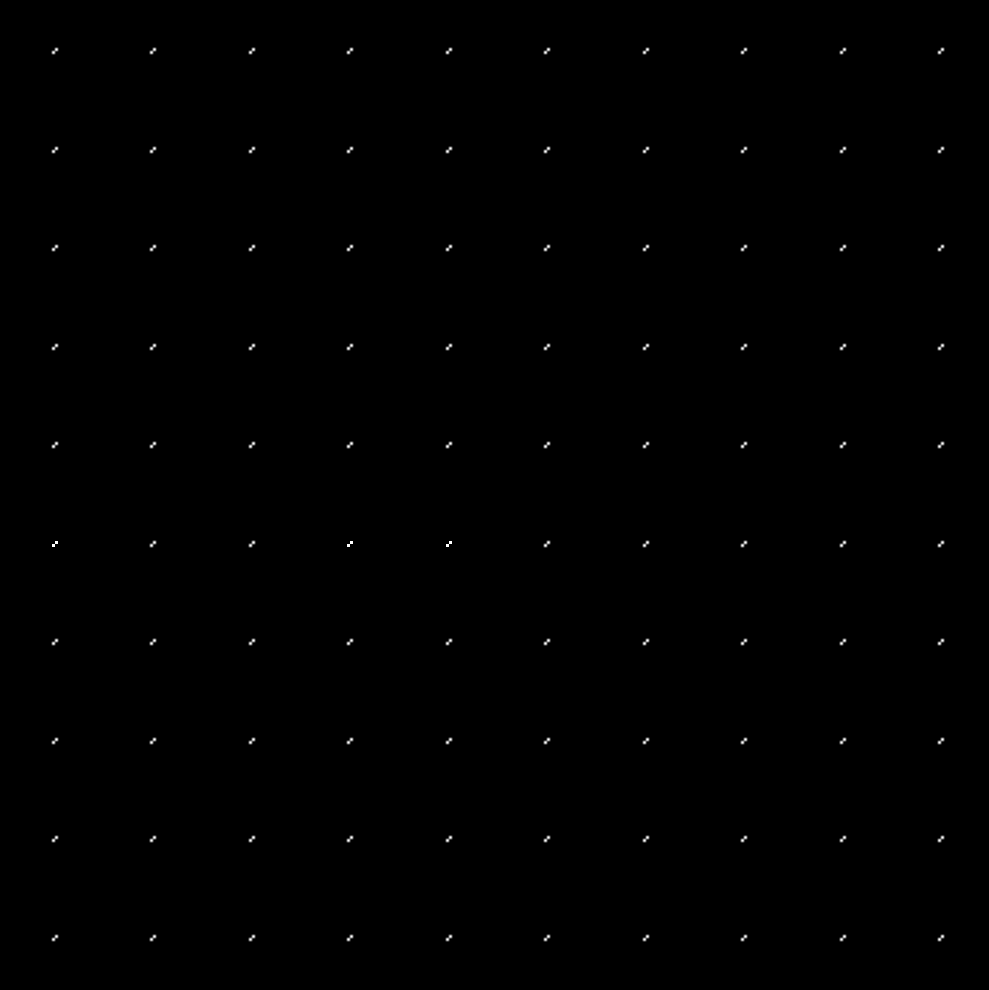

In [ ]:
import matplotlib.pyplot as plt
# Generate random noise as an input to initialize the generator
random_noise = np.random.normal(0,1, [100, 100])

# Generate the images from the noise
generated_images = generator.predict(random_noise)

# Visualize the generated images+
plt.figure(figsize=(10,10))
for i in range(generated_images.shape[0]):
    plt.subplot(10, 10, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

- The resulting plot shows the images generated by the GAN model.

**Notes:**

The output effectively demonstrates how model can generate images resembling handwritten digit 8. However, there is room for improving the quality of these images.

# __Conclusion__

In this demo, you have successfully implemented a GAN to generate images resembling handwritten digits, focusing on the MNIST dataset. The process involved constructing and training a generator and a discriminator. The results were promising, showcasing the GAN's ability to create images similar to the digit **8**, but also highlighted the need for further improvements in image quality.